In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")


In [31]:
%matplotlib inline

In [32]:
dat = yf.Ticker("VFIAX")
df = dat.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-08-05 00:00:00-04:00,472.832367,472.832367,472.832367,472.832367,0,0.0,0.0,0.0
2024-08-06 00:00:00-04:00,477.729523,477.729523,477.729523,477.729523,0,0.0,0.0,0.0
2024-08-07 00:00:00-04:00,474.056671,474.056671,474.056671,474.056671,0,0.0,0.0,0.0
2024-08-08 00:00:00-04:00,484.976532,484.976532,484.976532,484.976532,0,0.0,0.0,0.0
2024-08-09 00:00:00-04:00,487.306641,487.306641,487.306641,487.306641,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,588.250000,588.250000,588.250000,588.250000,0,0.0,0.0,0.0
2025-07-30 00:00:00-04:00,587.520020,587.520020,587.520020,587.520020,0,0.0,0.0,0.0
2025-07-31 00:00:00-04:00,585.390015,585.390015,585.390015,585.390015,0,0.0,0.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-08-05 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           250 non-null    float64
 1   High           250 non-null    float64
 2   Low            250 non-null    float64
 3   Close          250 non-null    float64
 4   Volume         250 non-null    int64  
 5   Dividends      250 non-null    float64
 6   Stock Splits   250 non-null    float64
 7   Capital Gains  250 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 17.6 KB


In [34]:
df= df.drop(["Volume", "Dividends", "Stock Splits","Capital Gains"], axis=1)
df

,Open,High,Low,Close
Date,,,,
2024-08-05 00:00:00-04:00,472.832367,472.832367,472.832367,472.832367
2024-08-06 00:00:00-04:00,477.729523,477.729523,477.729523,477.729523
2024-08-07 00:00:00-04:00,474.056671,474.056671,474.056671,474.056671
2024-08-08 00:00:00-04:00,484.976532,484.976532,484.976532,484.976532
2024-08-09 00:00:00-04:00,487.306641,487.306641,487.306641,487.306641
...,...,...,...,...
2025-07-29 00:00:00-04:00,588.250000,588.250000,588.250000,588.250000
2025-07-30 00:00:00-04:00,587.520020,587.520020,587.520020,587.520020
2025-07-31 00:00:00-04:00,585.390015,585.390015,585.390015,585.390015


In [35]:
df.index=df.index.strftime('%Y-%m-%d')
df

,Open,High,Low,Close
Date,,,,
2024-08-05,472.832367,472.832367,472.832367,472.832367
2024-08-06,477.729523,477.729523,477.729523,477.729523
2024-08-07,474.056671,474.056671,474.056671,474.056671
2024-08-08,484.976532,484.976532,484.976532,484.976532
2024-08-09,487.306641,487.306641,487.306641,487.306641
...,...,...,...,...
2025-07-29,588.250000,588.250000,588.250000,588.250000
2025-07-30,587.520020,587.520020,587.520020,587.520020
2025-07-31,585.390015,585.390015,585.390015,585.390015


In [36]:
df.index

Index(['2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
       '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
       ...
       '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-28',
       '2025-07-29', '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-04'],
      dtype='object', name='Date', length=250)

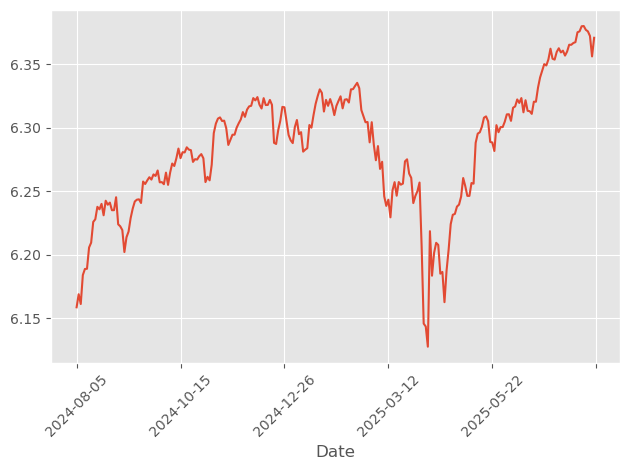

In [37]:
y = np.log(df["Close"])
y.plot()
plt.xticks(rotation=45)  # Rotates the date labels
plt.tight_layout()       # Adjusts layout to prevent overlap


In [38]:
y.isnull().sum()

0

In [39]:
y

Date
2024-08-05    6.158741
2024-08-06    6.169045
2024-08-07    6.161327
2024-08-08    6.184101
2024-08-09    6.188894
                ...   
2025-07-29    6.377152
2025-07-30    6.375910
2025-07-31    6.372278
2025-08-01    6.356212
2025-08-04    6.370877
Name: Close, Length: 250, dtype: float64

In [40]:
y.index = pd.to_datetime(y.index)
print(type(y.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [41]:
quarterly_stats = pd.DataFrame(dict(
    low=y.resample("Q").min(),
    high=y.resample("Q").max(),
    first=y.resample("Q").first(),
    last=y.resample("Q").last(),
    median=y.resample("Q").median(),
    mean=y.resample("Q").mean()
))
print(quarterly_stats)


                 low      high     first      last    median      mean
Date                                                                  
2024-09-30  6.158741  6.266435  6.158741  6.266435  6.235524  6.228121
2024-12-31  6.255124  6.324184  6.257100  6.290177  6.294467  6.292554
2025-03-31  6.229547  6.335420  6.287982  6.246397  6.301389  6.293479
2025-06-30  6.127734  6.350152  6.250194  6.350152  6.288688  6.267437
2025-09-30  6.349069  6.380123  6.349069  6.370877  6.363992  6.365049


In [42]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2024-08-05,6.158741,NaN,6.158741
2024-08-06,6.169045,NaN,6.165610
2024-08-07,6.161327,6.163038,6.163163
2024-08-08,6.184101,6.171491,6.174329
2024-08-09,6.188894,6.178107,6.181846
2024-08-12,6.189056,6.187350,6.185508
2024-08-13,6.205789,6.194580,6.195729
2024-08-14,6.209627,6.201491,6.202705
2024-08-15,6.225925,6.213781,6.214338


In [43]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.00872228561896625
rmse over ewma:  0.0067751333185221835


<Axes: xlabel='Date'>

<Figure size 1400x600 with 0 Axes>

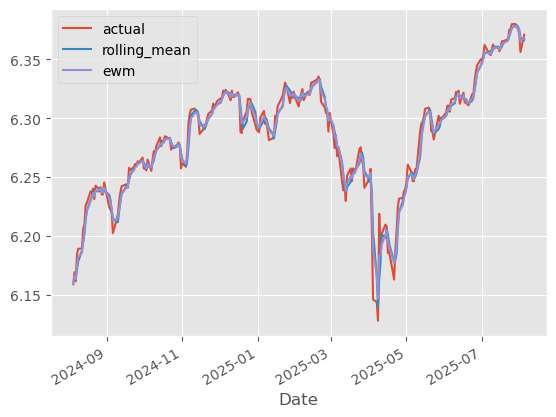

In [44]:
plt.figure(figsize=(14, 6))
y_rolling.plot()

In [45]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.728219
p-value: 0.416635


In [46]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2024-08-05,6.158741,NaN,NaN
2024-08-06,6.169045,NaN,NaN
2024-08-07,6.161327,NaN,NaN
2024-08-08,6.184101,0.025360,NaN
2024-08-09,6.188894,0.019849,-0.005511
2024-08-12,6.189056,0.027729,0.007880
2024-08-13,6.205789,0.021689,-0.006040
2024-08-14,6.209627,0.020733,-0.000956
2024-08-15,6.225925,0.036870,0.016136


In [47]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.800617
p-value: 0.000000


<Axes: xlabel='Date'>

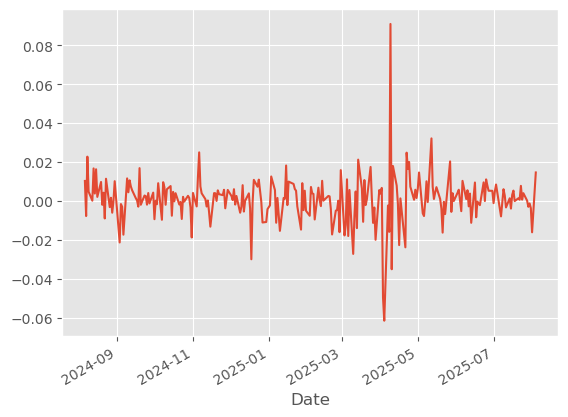

In [48]:
y.diff(periods=1).plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

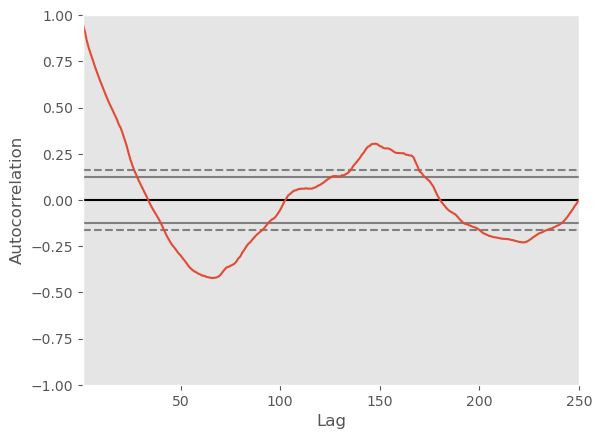

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

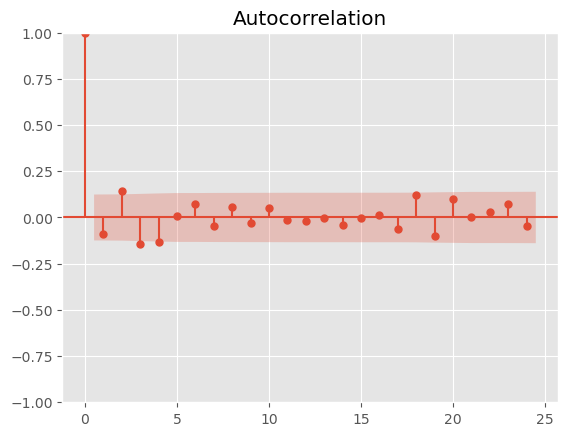

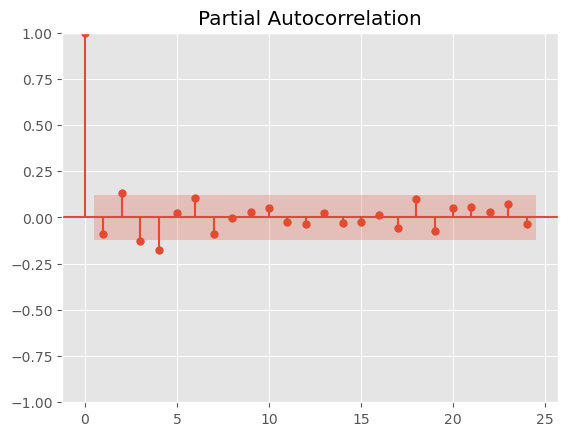

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y.diff(1).dropna())   # Use differenced data
plot_pacf(y.diff(1).dropna())
plt.show()


In [51]:
y = y.dropna()

C:\Users\Sainaren\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sainaren\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sainaren\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                0
count  250.000000
mean     0.025541
std      0.389642
min     -0.064775
25%     -0.003300
50%      0.001255
75%      0.006194
max      6.158741


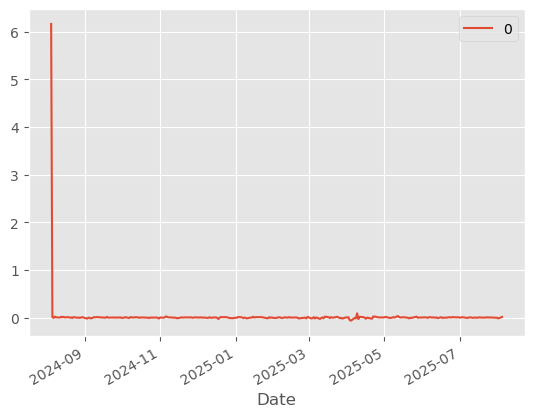

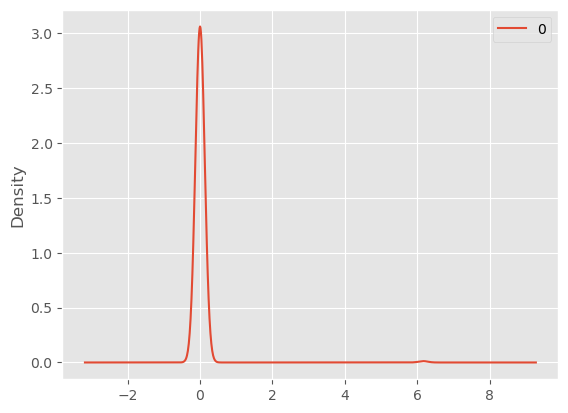

In [52]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(y, order=(0,1,1)) # p, d, q
model_fit = model.fit()
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [53]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 746.274
Date:                Mon, 04 Aug 2025   AIC                          -1488.549
Time:                        23:03:48   BIC                          -1481.514
Sample:                             0   HQIC                         -1485.717
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0675      0.032     -2.131      0.033      -0.130      -0.005
sigma2         0.0001   4.47e-06     32.657      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              2396.18
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.66   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

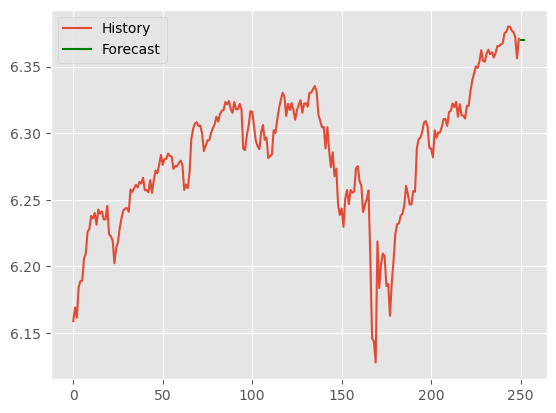

In [54]:
model = ARIMA(y.values, order=(0,1,1))
model_fit = model.fit()

# Forecast 3 steps ahead
forecast_res = model_fit.get_forecast(steps=3)
predictions = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# Plot
plt.plot(np.arange(len(y)), y.values, label="History")
plt.plot(np.arange(len(y), len(y)+3), predictions, color='green', label="Forecast")
plt.legend()
plt.show()


In [55]:
predictions[:3]

array([6.36996071, 6.36996071, 6.36996071])

predicted=6.234891, actual=6.185207
predicted=6.180433, actual=6.186561
predicted=6.183172, actual=6.162781
predicted=6.169065, actual=6.187607
predicted=6.185921, actual=6.204164
predicted=6.208392, actual=6.224210
predicted=6.225641, actual=6.231569
predicted=6.224973, actual=6.232216
predicted=6.227112, actual=6.237998
predicted=6.232952, actual=6.239555
predicted=6.239498, actual=6.245856
predicted=6.244910, actual=6.260493
predicted=6.259064, actual=6.254150
predicted=6.255857, actual=6.246435
predicted=6.242626, actual=6.246435
predicted=6.243661, actual=6.256562
predicted=6.258924, actual=6.256027
predicted=6.258694, actual=6.288179
predicted=6.283791, actual=6.295432
predicted=6.297967, actual=6.296499
predicted=6.293180, actual=6.300861
predicted=6.293330, actual=6.307970
predicted=6.308053, actual=6.309004
predicted=6.309533, actual=6.305132
predicted=6.303780, actual=6.288901
predicted=6.288010, actual=6.288475
predicted=6.286628, actual=6.281786
predicted=6.285205, actual=6

C:\Users\Sainaren\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


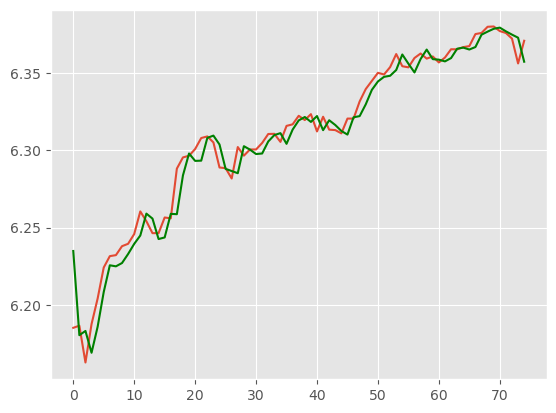

In [56]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test)
plt.plot(predictions, color='green')

In [57]:
result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2025-04-16,6.185207,6.234891
2025-04-17,6.186561,6.180433
2025-04-21,6.162781,6.183172
2025-04-22,6.187607,6.169065
2025-04-23,6.204164,6.185921
...,...,...
2025-07-29,6.377152,6.379384
2025-07-30,6.375910,6.376980
2025-07-31,6.372278,6.374852
